<a href="https://colab.research.google.com/github/willxpet/python_miniprojects/blob/main/garminToyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# PYTHON PRACTICE
## clean & prep data, visual exploration, simple regression,
## insights (meaure HR vs pace, determine if distance impacts this,
## and see if there is a trend in aerobic efficiency)

import pandas as pd
df = pd.read_csv("/content/sample_data/garminToyData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      40 non-null     object 
 1   distance  40 non-null     float64
 2   avg_hr    40 non-null     int64  
 3   avg_pace  40 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


In [14]:
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      40 non-null     datetime64[ns]
 1   distance  40 non-null     float64       
 2   avg_hr    40 non-null     int64         
 3   avg_pace  40 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [19]:
def pace_to_secs(pace_str):
  mins, secs = pace_str.split(':')
  return int(mins) * 60 + int(secs)

df['avg_pace_secs'] = df['avg_pace'].apply(pace_to_secs)
df['avg_pace_secs'].head()

,avg_pace_secs
0,477
1,373
2,316
3,384
4,388


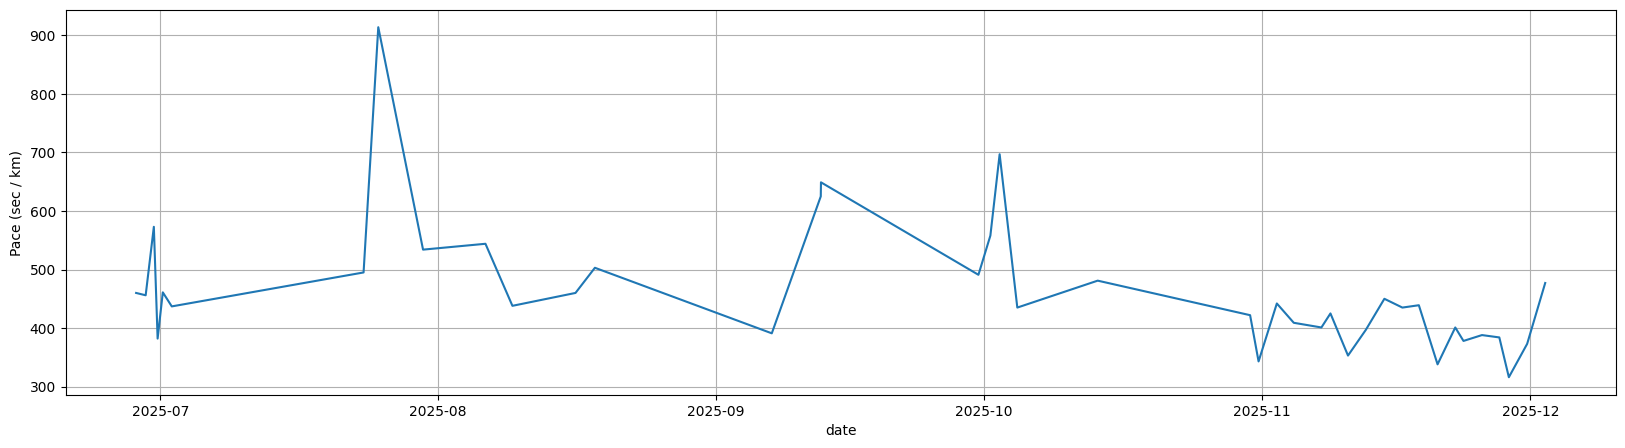

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.plot(df['date'],df['avg_pace_secs'])
plt.xlabel('date')
plt.ylabel('Pace (sec / km)')
plt.grid(True)
plt.show()


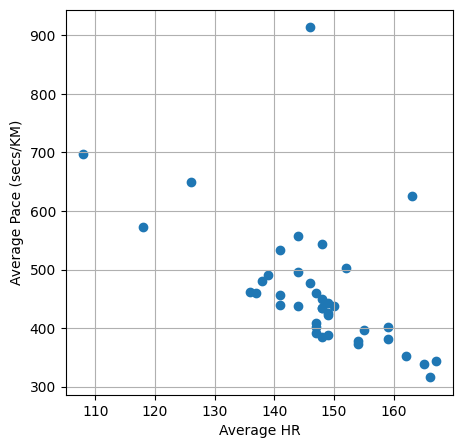

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(df['avg_hr'],df['avg_pace_secs'])
plt.xlabel('Average HR')
plt.ylabel('Average Pace (secs/KM)')
plt.grid(True)
plt.show()

In [43]:
import statsmodels.api as sm

X = df[['avg_hr','distance']]
X = sm.add_constant(X)
y = df['avg_pace_secs']

print(type(y))
print(y.shape)
print(y.head())

print(df.columns)

model = sm.OLS(y,X).fit()
print(model.summary())

<class 'pandas.core.series.Series'>
(40,)
0    477
1    373
2    316
3    384
4    388
Name: avg_pace_secs, dtype: int64
Index(['date', 'distance', 'avg_hr', 'avg_pace', 'avg_pace_secs'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:          avg_pace_secs   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     17.10
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           5.49e-06
Time:                        19:21:22   Log-Likelihood:                -231.54
No. Observations:                  40   AIC:                             469.1
Df Residuals:                      37   BIC:                             474.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
      